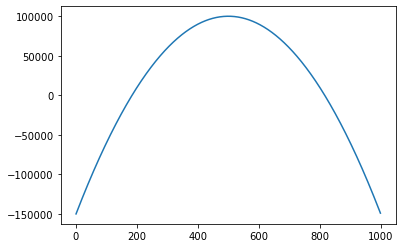

In [74]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 1000)
y = -(x-500)**2 + 100000
plt.plot(x, y)

In [78]:
LONGITUD_CROMOSOMA = 10

class Individuo:
    def __init__(self, cromosoma):  
        """
        Parameters:
        cromosoma: List de int de 1s y 0s, cada valor se denomina gen
        """
        self.cromosoma = cromosoma
              
    def get_fenotipo(self):
        """
        Devuelve el valor representado por el cromosoma(binario) como un valor entero.
        Retorna x como entero
        
        Returns: int
        """         

        return int(''.join(map(lambda x: str(int(x)), self.cromosoma )), 2)
    #Función fitness
    def fevaluar(self):
        """
        Evalúa el individuo en una función fiteness f(x)
            
        Returns: int
        """
        x = self.get_fenotipo()
        if x < 184 or x > 800: return 0
        
        y = -(self.get_fenotipo()-500)**2 + 100000
        return y
    
    def __gt__(self, otro):
        return self.fevaluar() > otro.fevaluar()
    
    def __eq__(self, otro):
        return self.cromosoma == otro.cromosoma
    
    def __str__(self):
        return (self.cromosoma.__str__() + " x={} puntaje: {}".format(self.get_fenotipo() , self.fevaluar()))
    
    def __repr__(self):
        return self.__str__()

    
##
i1 = Individuo(cromosoma=[1,0,0,0,0,0, 1, 1])
print(i1)

[1, 0, 0, 0, 0, 0, 1, 1] x=131 puntaje: 0


In [79]:
#Mitad del primer padre + mitad del segundo padre

def cruzar(padre1, padre2):
    """
        Cruza dos individuos y genera un hijo. 
        El cromosoma del hijo resultante corresponde a la primera 
        mitad del cromosoma del padre1 unido con la segunda mitad del cromosoma del padre2
        
        Parameters:
        padre1: Individuo
        padre2: Individuo
        
        Returns:
        hijo: Individuo
    """
    cromosoma=[]
    mitad = int(len(padre1.cromosoma)/2)
    for i in range(len(padre1.cromosoma)):
        if(i<mitad):
            cromosoma.append(padre1.cromosoma[i])
        else:
            cromosoma.append(padre2.cromosoma[i])
            
    ## Generar cromosoma hijo
    ## ...
    ##
    hijo = Individuo(cromosoma)
    return hijo

i1 = Individuo([1,0,1,0,0,0])
i2 = Individuo([0,0,0,1,1,1])

i3 = cruzar(i1, i2)
i3

[1, 0, 1, 1, 1, 1] x=47 puntaje: 0

In [80]:
import random
def mutar(individuo, prob=0.1):
    """
      Recibe un individuo y retorna otro individuo donde
      cada uno los genes de su cromosoma, pudo haberse mutado con probabilidad prob.
      
      Parameters:
      individuo: Individuo
      prob: float, probabilidad de mutación de un gen, valor entre 0 y 1
      
      Returns:
      individuo: Individuo
      
    """
    
    for index, gen in enumerate(individuo.cromosoma):
        if random.random() < prob:
            if(individuo.cromosoma[index]==0):
                individuo.cromosoma[index]=1
            else:
                individuo.cromosoma[index]=0
            
    return individuo

i1 = Individuo([1,0,1,0,0,0])
print(mutar(i1))

[1, 0, 1, 0, 0, 0] x=40 puntaje: 0


In [81]:
def generar_random_cromosoma(longitud=5):
    """
        Genera un cromosoma de cierta longitud cuyos genes se generan de manera aleatorio.
        
        Parameters:
        longitud: int, longitud del cromosoma (tamano de la lista)
        
        Returns:
        cromosoma: List de int de 1s y 0s
    """
    cromosoma = []
    for i in range(longitud):
        gen = random.randint(0,1)
        cromosoma.append(gen)
    return cromosoma
    
    
generar_random_cromosoma()

[1, 0, 1, 0, 0]

In [82]:
def generar_poblacion_inicial(tamano_poblacion=10, longitud_cromosoma=5, vmin=188, vmax=400):
    """
        Genera una población inicial de individuos donde cada individuo tiene 
        un cromosoma generado de manera aleatoria.
        
        Parameters:
        tamano_poblacion: int, número de individuos a generar
        longitud_cromosoma: int, longitud del cromosoma de cada individuo
        vmin: int, valor mínimo que puede tener el fenotipo de los individuos generados
        vmax: int, valor máximo que puede tener el fenotipo de los individuos generados
        
        Returns:
        poblacion: List[Individuo], lista de individuos
        
    """
        
    
    poblacion = []
    for i in range(tamano_poblacion):
        repetir = True
        while repetir:
            individuo = Individuo(generar_random_cromosoma(longitud=longitud_cromosoma))
            if individuo not in poblacion and individuo.get_fenotipo()>vmin and individuo.get_fenotipo()<vmax:
                poblacion.append(individuo)
                repetir = False

    return poblacion

generar_poblacion_inicial(longitud_cromosoma=LONGITUD_CROMOSOMA)

[[0, 1, 0, 1, 0, 1, 0, 1, 1, 1] x=343 puntaje: 75351,
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 1] x=239 puntaje: 31879,
 [0, 0, 1, 1, 0, 0, 1, 0, 0, 1] x=201 puntaje: 10599,
 [0, 1, 0, 1, 1, 0, 0, 1, 1, 0] x=358 puntaje: 79836,
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 0] x=324 puntaje: 69024,
 [0, 1, 0, 0, 1, 1, 1, 0, 1, 0] x=314 puntaje: 65404,
 [0, 1, 0, 1, 1, 1, 0, 1, 1, 0] x=374 puntaje: 84124,
 [0, 1, 0, 0, 0, 0, 1, 0, 1, 1] x=267 puntaje: 45711,
 [0, 0, 1, 1, 0, 1, 1, 0, 1, 0] x=218 puntaje: 20476,
 [0, 0, 1, 1, 0, 1, 0, 0, 1, 1] x=211 puntaje: 16479]

In [83]:
poblacion = generar_poblacion_inicial(10, LONGITUD_CROMOSOMA)
poblacion.sort(reverse=True)
poblacion



[[0, 1, 0, 1, 1, 0, 1, 1, 1, 1] x=367 puntaje: 82311,
 [0, 1, 0, 1, 0, 1, 1, 1, 1, 1] x=351 puntaje: 77799,
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 1] x=329 puntaje: 70759,
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 0] x=324 puntaje: 69024,
 [0, 1, 0, 0, 0, 1, 0, 0, 1, 0] x=274 puntaje: 48924,
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 1] x=273 puntaje: 48471,
 [0, 0, 1, 1, 1, 1, 1, 0, 1, 1] x=251 puntaje: 37999,
 [0, 0, 1, 1, 1, 0, 1, 1, 0, 0] x=236 puntaje: 30304,
 [0, 0, 1, 1, 0, 1, 1, 1, 1, 0] x=222 puntaje: 22716,
 [0, 0, 1, 1, 0, 0, 1, 1, 1, 1] x=207 puntaje: 14151]

In [84]:
poblacion = generar_poblacion_inicial(5, LONGITUD_CROMOSOMA)

def seleccionar_padre_por_toreno(poblacion):
    """
        Selecciona un individio de la población
        para ser padre utilizando el método de torneo.
        
        Parameters:
        poblacion: list[Individuo], lista de individuos de 
        donde se va a seleccionar uno como padre
        
        Returns:
        padre: Individuo
    """
    
    padre1 = random.choice(poblacion)
    padre2 = random.choice(poblacion)
    padre = max(padre1, padre2)
    return padre

print(poblacion)
print("\n")
p = seleccionar_padre_por_toreno(poblacion)
print(p)

[[0, 1, 0, 0, 0, 0, 1, 0, 0, 1] x=265 puntaje: 44775, [0, 1, 0, 0, 1, 1, 0, 0, 1, 0] x=306 puntaje: 62364, [0, 1, 0, 0, 0, 0, 0, 0, 0, 1] x=257 puntaje: 40951, [0, 1, 0, 0, 0, 1, 0, 0, 0, 1] x=273 puntaje: 48471, [0, 1, 0, 0, 0, 0, 1, 0, 1, 1] x=267 puntaje: 45711]


[0, 1, 0, 0, 0, 1, 0, 0, 0, 1] x=273 puntaje: 48471


In [85]:
import copy
poblacion = generar_poblacion_inicial(20, LONGITUD_CROMOSOMA)


padres = []

def generar_padres(poblacion, num_padres=6):
    """
        Genera una lista de padres a partir de una población(lista de individuos).
        Utiliza el método de selección por torneo.
        
        Parameters:
        poblacion: List[individuo]
        num_padres: int, número de padres a seleccionar
        
        Returns:
        padres: list[Individuo]
    """
    
    posibles_padres = copy.deepcopy(poblacion)
    padres_seleccionados = []
    posibles_padres.sort(reverse=True)
    for i in range(num_padres):
        padre = seleccionar_padre_por_toreno(posibles_padres)
        padres_seleccionados.append(padre)
        posibles_padres.remove(padre)
        
    return padres_seleccionados
padres = generar_padres(poblacion)
print(poblacion,"\n")
print(padres)

[[0, 0, 1, 1, 0, 0, 1, 0, 0, 1] x=201 puntaje: 10599, [0, 1, 0, 1, 0, 1, 0, 0, 0, 1] x=337 puntaje: 73431, [0, 1, 0, 1, 1, 0, 1, 0, 1, 1] x=363 puntaje: 81231, [0, 1, 0, 0, 0, 1, 0, 0, 0, 1] x=273 puntaje: 48471, [0, 1, 0, 0, 0, 0, 1, 0, 0, 1] x=265 puntaje: 44775, [0, 1, 0, 1, 0, 1, 1, 1, 0, 0] x=348 puntaje: 76896, [0, 1, 0, 1, 1, 0, 1, 1, 1, 1] x=367 puntaje: 82311, [0, 1, 0, 0, 0, 0, 0, 0, 1, 0] x=258 puntaje: 41436, [0, 1, 0, 1, 1, 1, 0, 0, 0, 0] x=368 puntaje: 82576, [0, 1, 0, 1, 0, 1, 1, 0, 0, 1] x=345 puntaje: 75975, [0, 1, 0, 0, 1, 0, 0, 0, 0, 1] x=289 puntaje: 55479, [0, 1, 0, 0, 0, 1, 1, 1, 0, 0] x=284 puntaje: 53344, [0, 0, 1, 1, 1, 1, 0, 1, 1, 1] x=247 puntaje: 35991, [0, 1, 0, 0, 1, 0, 1, 1, 0, 1] x=301 puntaje: 60399, [0, 1, 0, 1, 0, 1, 1, 1, 1, 0] x=350 puntaje: 77500, [0, 0, 1, 1, 1, 0, 1, 1, 1, 0] x=238 puntaje: 31356, [0, 0, 1, 1, 1, 1, 0, 0, 1, 1] x=243 puntaje: 33951, [0, 0, 1, 1, 1, 1, 1, 1, 0, 1] x=253 puntaje: 38991, [0, 0, 1, 1, 0, 1, 1, 1, 1, 1] x=223 puntaje:

In [86]:
## ALGORITMO GENÉTICO
#Cada familia tiene 2 hijos
poblacion = generar_poblacion_inicial(10, LONGITUD_CROMOSOMA)
anterior_mejor = None
for i in range(100):
    poblacion.sort(reverse=True)
    anterior_mejor = poblacion[0]
    
    print("Generacion {}".format(i) )
    for i in poblacion:
        print(i)
    nueva_poblacion = []
    
    for i in range(int(len(poblacion)/2)):
        padres =generar_padres(poblacion,2)
        hijo1 = cruzar(padres[0],padres[1])
        hijo2 = cruzar(padres[1],padres[0])
        ## mutar hijos
        hijo1 = mutar(hijo1)
        hijo2 = mutar(hijo2)
        ## agrega hijos a la nueva población
        nueva_poblacion.append(hijo1)
        nueva_poblacion.append(hijo2)
        ## ...
    
    poblacion = nueva_poblacion
    
    # Eltismo: Incluye al mejor de la generación anterior en la nueva generación
    poblacion.sort(reverse=True)
    poblacion[-1] = anterior_mejor  

Generacion 0
[0, 1, 1, 0, 0, 0, 1, 1, 0, 0] x=396 puntaje: 89184
[0, 1, 1, 0, 0, 0, 1, 0, 0, 0] x=392 puntaje: 88336
[0, 1, 0, 1, 1, 1, 1, 0, 0, 1] x=377 puntaje: 84871
[0, 1, 0, 1, 1, 1, 0, 0, 0, 1] x=369 puntaje: 82839
[0, 1, 0, 1, 0, 1, 0, 1, 1, 0] x=342 puntaje: 75036
[0, 1, 0, 0, 1, 1, 0, 0, 1, 1] x=307 puntaje: 62751
[0, 0, 1, 1, 0, 1, 1, 1, 0, 1] x=221 puntaje: 22159
[0, 0, 1, 1, 0, 1, 1, 0, 1, 0] x=218 puntaje: 20476
[0, 0, 1, 1, 0, 1, 0, 1, 1, 1] x=215 puntaje: 18775
[0, 0, 1, 1, 0, 0, 1, 1, 1, 1] x=207 puntaje: 14151
Generacion 1
[0, 1, 1, 1, 0, 1, 1, 0, 0, 1] x=473 puntaje: 99271
[0, 1, 1, 0, 0, 1, 1, 0, 0, 1] x=409 puntaje: 91719
[0, 1, 1, 0, 0, 0, 1, 1, 0, 0] x=396 puntaje: 89184
[0, 1, 1, 0, 0, 0, 1, 0, 0, 1] x=393 puntaje: 88551
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1] x=381 puntaje: 85839
[0, 1, 0, 1, 1, 1, 1, 0, 1, 0] x=378 puntaje: 85116
[0, 1, 0, 1, 1, 0, 1, 1, 0, 0] x=364 puntaje: 81504
[0, 0, 1, 1, 0, 1, 1, 1, 1, 1] x=223 puntaje: 23271
[0, 0, 1, 1, 0, 0, 1, 0, 1, 1] x=203 p